In [3]:
#FEATURE STAT DESCRIPTION AND TRANSFORMATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(16,10)})
print('Done')

Done


In [2]:
#df=pd.read_csv('G:/My Drive/Uber movement/Codes and datasets/Datasets/dc_2018q1_clean_1.csv')
df=pd.read_csv('dc_2018q1_clean_1.csv')
df.info
df.columns

Index(['Origin Movement ID', 'Destination Movement ID',
       'Mean Travel Time (Seconds)',
       'Range - Lower Bound Travel Time (Seconds)',
       'Range - Upper Bound Travel Time (Seconds)', 'Date', 'AWND', 'PRCP',
       'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WSF2', 'WSF5', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT09', 'Month', 'DOW',
       'dst_graph_area_m', 'dst_clean_intersection_density_km',
       'dst_street_density_km', 'src_mxbc_node', 'dst_mxbc_node',
       'dst_railsubway_density_km', 'spath', 'epath', 'circuit'],
      dtype='object')

In [4]:
df=pd.concat([df,pd.get_dummies(data=df['DOW'],prefix='DOW')],axis=1)
df=pd.concat([df,pd.get_dummies(data=df['Month'],prefix='MON')],axis=1)
import datetime
import holidays
dc_holidays = holidays.UnitedStates(state='DC')
Q1_holiday={dc_holidays.get(i) for i in df.Date}
print(Q1_holiday)
df['Workday']=df.Date.apply(lambda x: 1 if (not x in dc_holidays) and (pd.to_datetime(x).weekday()<5) else 0)
df.head()

{'Martin Luther King, Jr. Day', "Washington's Birthday", None, "New Year's Day"}


,Origin Movement ID,Destination Movement ID,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds),Date,AWND,PRCP,SNOW,SNWD,...,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,MON_1,MON_2,MON_3,Workday
0,186,1,645,480,865,2018-01-07,8.95,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
1,186,2,1580,1292,1931,2018-01-07,8.95,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
2,186,3,1173,947,1452,2018-01-07,8.95,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
3,186,4,1634,1403,1902,2018-01-07,8.95,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
4,186,5,913,720,1157,2018-01-07,8.95,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0


In [5]:
df_anly=df[['Mean Travel Time (Seconds)', 'Date', 'AWND', 'PRCP', 'SNOW', 'SNWD',
       'TAVG', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06',
       'WT08', 'Month', 'DOW', 'dst_street_density_km',
       'dst_railsubway_density_km', 'spath', 'Workday', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'MON_1', 'MON_2', 'MON_3']]

df_anly.columns = ['Mean Travel Time (Seconds)', 'Date', 'AWND', 'PRCP', 'SNOW', 'SNWD',
       'TAVG', 'WT02_HeavyFog', 'WT03_Thunder', 'WT04_IcePell', 'WT05_Hail', 'WT06_Glaze/Rime',
       'WT08_Smoke/Haze', 'Month', 'Day of Week', 'DSTStrDen',
       'DSTRailDen', 'ShorPth', 'Workday', 'DoW_Mon', 'DoW_Tue',
       'DoW_Wed', 'DoW_Thu', 'DoW_Fri', 'DoW_Sat', 'DoW_Sun', 'Month_Jan', 'Month_Feb', 'Month_Mar' ]
df_anly.head()
df_anly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47203 entries, 0 to 47202
Data columns (total 29 columns):
Mean Travel Time (Seconds)    47203 non-null int64
Date                          47203 non-null object
AWND                          47203 non-null float64
PRCP                          47203 non-null float64
SNOW                          47203 non-null float64
SNWD                          47203 non-null float64
TAVG                          47203 non-null int64
WT02_HeavyFog                 2577 non-null float64
WT03_Thunder                  535 non-null float64
WT04_IcePell                  1024 non-null float64
WT05_Hail                     0 non-null float64
WT06_Glaze/Rime               523 non-null float64
WT08_Smoke/Haze               1044 non-null float64
Month                         47203 non-null int64
Day of Week                   47203 non-null int64
DSTStrDen                     47203 non-null float64
DSTRailDen                    47203 non-null float64
ShorPth   

In [8]:
#GHCN Daily documentation description
#GHCN (Global Historical Climatology Network)-Daily is a database 
    #that addresses the critical need for historical daily temperature, 
    #precipitation, and snow records over global land areas. 
#GHCN-Daily is a composite of climate records from numerous sources 
    #that were merged and then subjected to a suite of quality assurance reviews. 
#The archive includes over 40 meteorological elements (see Table 4 below for complete list) 
    #including temperature daily maximum/minimum, temperature at observation time, 
    #precipitation, snowfall, snow depth, evaporation, 
    #wind movement, wind maximums, soil temperature, cloudiness, and more.

In [9]:
#Weather relevant featuures description:
    #AWND = Average daily wind speed (meters per second or miles per hour as per user preference)
    #PRCP = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)
    #SNOW = Snowfall (mm or inches as per user preference, inches to tenths on Daily Form pdf file)
    #SNWD = Snow depth (mm or inches as per user preference, inches on Daily Form pdf file)
    #TAVG = the average of TMAX and TMIN for the day
    #TMAX = Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file)
    #TMIN = Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file)
    #WSF2 = Fastest 2-minute wind speed (miles per hour or meters per second as per user preference)
    #WSF5 = Fastest 5-second wind speed (miles per hour or meters per second as per user preference)
    #WT** = Weather Type where ** has one of the following values:
        #01 = Fog, ice fog, or freezing fog (may include heavy fog)
        #02 = Heavy fog or heaving freezing fog (not always distinguished from fog)
        #03 = Thunder
        #04 = Ice pellets, sleet, snow pellets, or small hail
        #05 = Hail (may include small hail)
        #06 = Glaze or rime
        #08 = Smoke or haze
        #09 = Blowing or drifting snow
    


In [10]:
df_anly.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean Travel Time (Seconds),47203.0,1310.112450,449.992455,164.000000,994.000000,1314.000000,1619.000000,3723.000000
AWND,47203.0,10.169905,4.543158,3.360000,6.710000,10.070000,12.750000,29.970000
PRCP,47203.0,0.085529,0.228046,0.000000,0.000000,0.000000,0.030000,1.120000
SNOW,47203.0,0.062195,0.426660,0.000000,0.000000,0.000000,0.000000,4.100000
SNWD,47203.0,0.047404,0.268443,0.000000,0.000000,0.000000,0.000000,2.000000
TAVG,47203.0,40.800881,10.814745,15.000000,36.000000,40.000000,47.000000,67.000000
WT02_HeavyFog,2577.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
WT03_Thunder,535.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
WT04_IcePell,1024.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
WT05_Hail,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#df_anly.to_csv('G:/My Drive/Uber movement/Codes and datasets/Datasets/DC_2018Q1_clean_1.csv', index=False)

In [6]:
##1.3 NAN replacement
nalst=df_anly.columns[df_anly.isna().any()].tolist()
print(nalst)
for i in nalst:
    if df_anly[i].isna().sum()==df_anly.shape[0]: # remove columns without any valid data (all nan in a column)
        print('remove columns without any valid data', i)
        df_anly=df_anly.drop(columns=[i],axis=1)
    else:
        print('replace nan with 0 in columns', i)
        df_anly[i]=df_anly[i].apply(lambda x: x if pd.notna(x) else 0)
df_anly.describe().T

['WT02_HeavyFog', 'WT03_Thunder', 'WT04_IcePell', 'WT05_Hail', 'WT06_Glaze/Rime', 'WT08_Smoke/Haze']
replace nan with 0 in columns WT02_HeavyFog
replace nan with 0 in columns WT03_Thunder
replace nan with 0 in columns WT04_IcePell
remove columns without any valid data WT05_Hail
replace nan with 0 in columns WT06_Glaze/Rime
replace nan with 0 in columns WT08_Smoke/Haze


C:\Users\fosha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,count,mean,std,min,25%,50%,75%,max
Mean Travel Time (Seconds),47203.0,1310.112450,449.992455,164.000000,994.000000,1314.000000,1619.000000,3723.000000
AWND,47203.0,10.169905,4.543158,3.360000,6.710000,10.070000,12.750000,29.970000
PRCP,47203.0,0.085529,0.228046,0.000000,0.000000,0.000000,0.030000,1.120000
SNOW,47203.0,0.062195,0.426660,0.000000,0.000000,0.000000,0.000000,4.100000
SNWD,47203.0,0.047404,0.268443,0.000000,0.000000,0.000000,0.000000,2.000000
TAVG,47203.0,40.800881,10.814745,15.000000,36.000000,40.000000,47.000000,67.000000
WT02_HeavyFog,47203.0,0.054594,0.227188,0.000000,0.000000,0.000000,0.000000,1.000000
WT03_Thunder,47203.0,0.011334,0.105857,0.000000,0.000000,0.000000,0.000000,1.000000
WT04_IcePell,47203.0,0.021694,0.145682,0.000000,0.000000,0.000000,0.000000,1.000000
WT06_Glaze/Rime,47203.0,0.011080,0.104677,0.000000,0.000000,0.000000,0.000000,1.000000


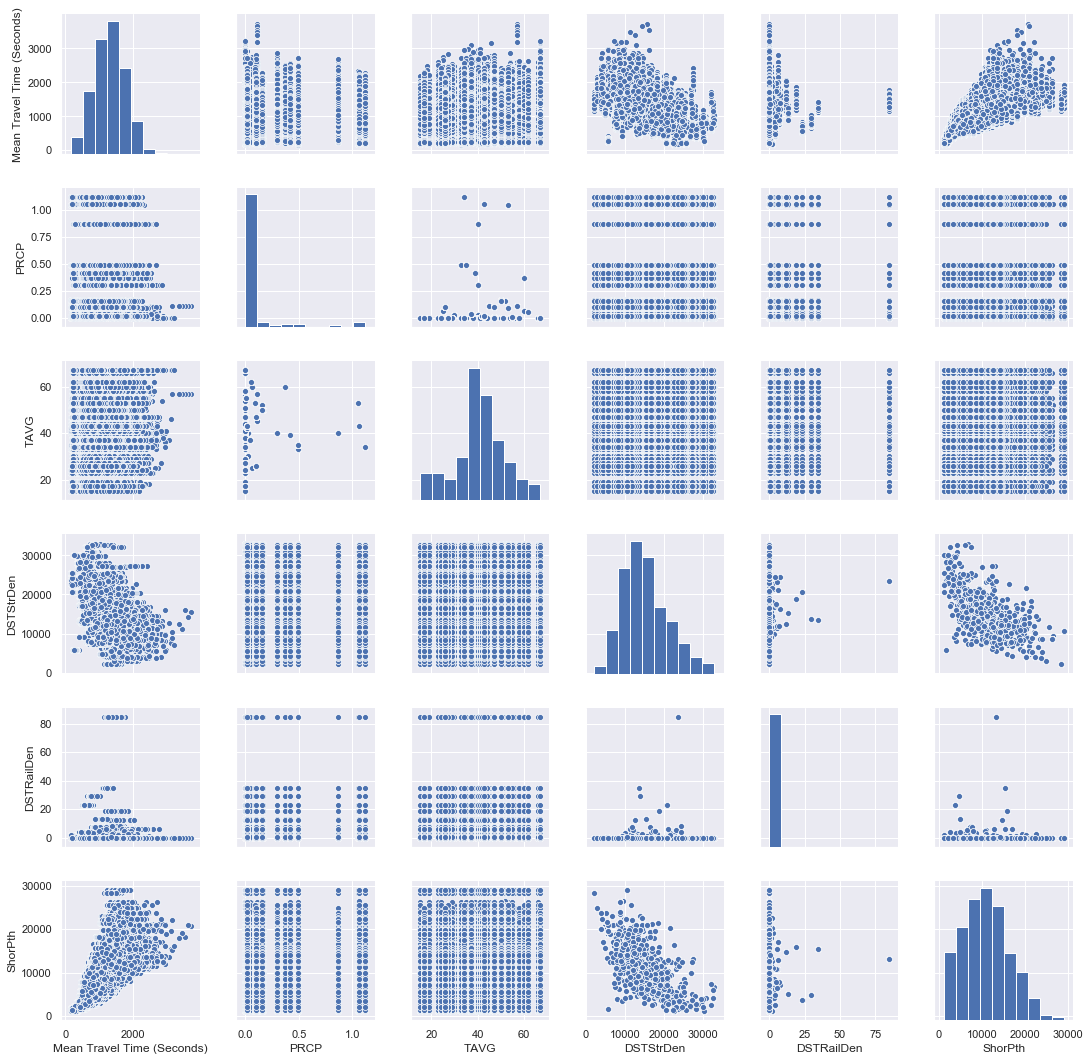

In [7]:
sns.pairplot(df_anly[['Mean Travel Time (Seconds)', 'PRCP', 
       'TAVG', 'DSTStrDen','DSTRailDen', 'ShorPth']])

In [8]:
###1.4.3 log transformation of travel time
df_anly['Log_Mean Travel Time']=np.log(df_anly['Mean Travel Time (Seconds)'])
print(df_anly[['Log_Mean Travel Time', 'Mean Travel Time (Seconds)']].head())

   Log_Mean Travel Time  Mean Travel Time (Seconds)
0              6.469250                         645
1              7.365180                        1580
2              7.067320                        1173
3              7.398786                        1634
4              6.816736                         913


Text(0.5, 1, 'ShortestPath vs. Mean Travel Time (Seconds)')

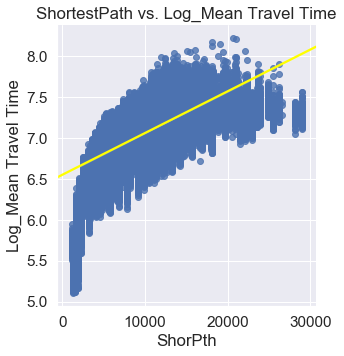

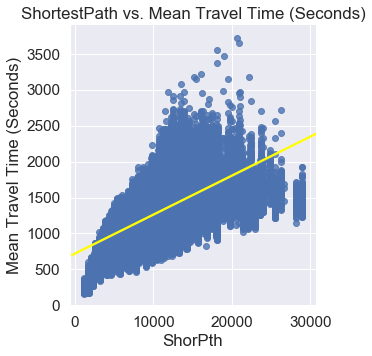

In [9]:
###1.5.4 Traveling time * shortest path
sns.set(font_scale=1.4)
ax10=sns.lmplot(x='ShorPth', y="Log_Mean Travel Time", data=df_anly,line_kws={'color': 'yellow'});
plt.title('ShortestPath vs. Log_Mean Travel Time')
ax11=sns.lmplot(x='ShorPth', y="Mean Travel Time (Seconds)", data=df_anly,line_kws={'color': 'yellow'});
plt.title('ShortestPath vs. Mean Travel Time (Seconds)')


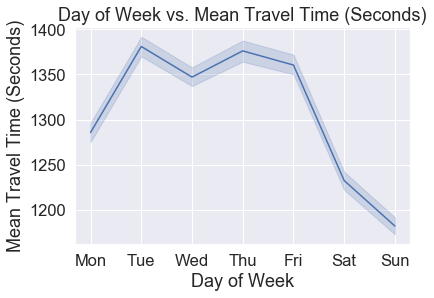

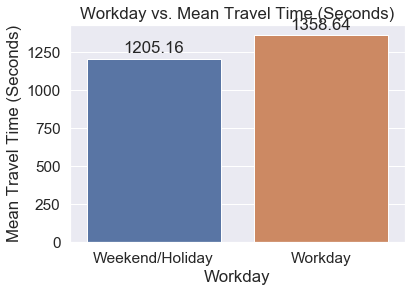

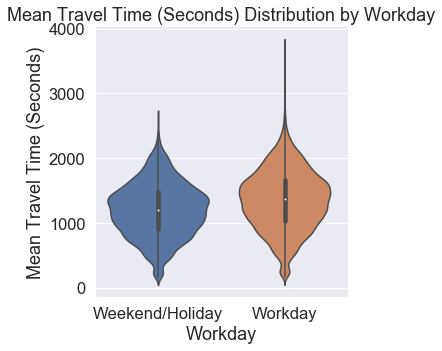

In [10]:
###1.5.1 Traveling time by date
#f, axs = plt.subplots(1,2,figsize=(22,10))
#plt.subplot(1,3,1)
#ax20= sns.barplot(x=df_anly['Month'],y=df_anly['Log_Mean Travel Time (Seconds)'], data=df_anly)
#plt.subplot(1,2,1)
#plt.figure(figsize=(7, 7))
sns.set(font_scale=1.5)
x1=df_anly['Day of Week']
ax21= sns.lineplot(x=x1,y=df_anly['Mean Travel Time (Seconds)'], data=df_anly)
plt.title('Day of Week vs. Mean Travel Time (Seconds)')
plt.xlabel('Day of Week')
plt.xticks([0,1,2,3,4,5,6],['Mon', 'Tue','Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

#plt.subplot(1,2,2)
sns.set(font_scale=1.4)
x2=df_anly['Workday']
yvalues=df_anly.groupby('Workday')['Mean Travel Time (Seconds)'].aggregate('mean').reset_index()
#plt.figure(figsize=(7, 7))
ax22= sns.barplot(x=yvalues['Workday'],y=yvalues['Mean Travel Time (Seconds)'], data=yvalues)
plt.xticks([0,1],['Weekend/Holiday', 'Workday'])
plt.title('Workday vs. Mean Travel Time (Seconds)')
for p in ax22.patches:
    ax22.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()
#plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)
ax23=sns.catplot(x="Workday", y="Mean Travel Time (Seconds)",kind="violin", split=True, data=df_anly)
plt.xticks([0,1],['Weekend/Holiday', 'Workday'])
plt.title('Mean Travel Time (Seconds) Distribution by Workday')
plt.show()

In [11]:
##t-test
from scipy import stats
print(df_anly.groupby('Workday')['Mean Travel Time (Seconds)'].describe())
Workday_mean_time = df_anly.loc[df_anly['Workday'] == 1,'Mean Travel Time (Seconds)']
Weekend_mean_time = df_anly.loc[df_anly['Workday'] == 0,'Mean Travel Time (Seconds)']
print(stats.levene(Workday_mean_time,Weekend_mean_time))
print(stats.ttest_ind(Workday_mean_time,Weekend_mean_time,equal_var=False))

           count         mean         std    min      25%     50%     75%  \
Workday                                                                     
0        14924.0  1205.158537  412.958214  167.0   912.75  1210.0  1486.0   
1        32279.0  1358.637256  458.068899  164.0  1040.00  1369.0  1672.0   

            max  
Workday          
0        2613.0  
1        3723.0  
LeveneResult(statistic=188.17693993852504, pvalue=9.602277269720148e-43)
Ttest_indResult(statistic=36.24857366465511, pvalue=5.48709610641044e-282)


C:\Users\fosha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


   Day of Week  Mean Travel Time (Seconds) Month
0            6                         645   Jan
1            6                        1580   Jan
2            6                        1173   Jan
3            6                        1634   Jan
4            6                         913   Jan


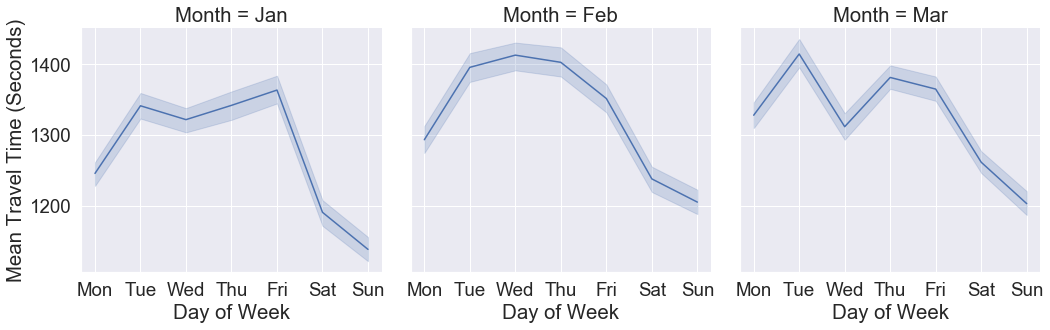

In [12]:
###1.5.2 Traveling time by DOW and Month
sns.set(font_scale=1.7)
rel=df_anly[['Day of Week','Mean Travel Time (Seconds)','Month']]
rel['Month']=rel['Month'].map({1:'Jan',2:'Feb',3:'Mar'})
print(rel.head())
ax3 = sns.relplot(x="Day of Week", y="Mean Travel Time (Seconds)",
                  col="Month", kind="line", data=rel,col_order=['Jan','Feb','Mar'])
plt.xticks([0,1,2,3,4,5,6],['Mon', 'Tue','Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()


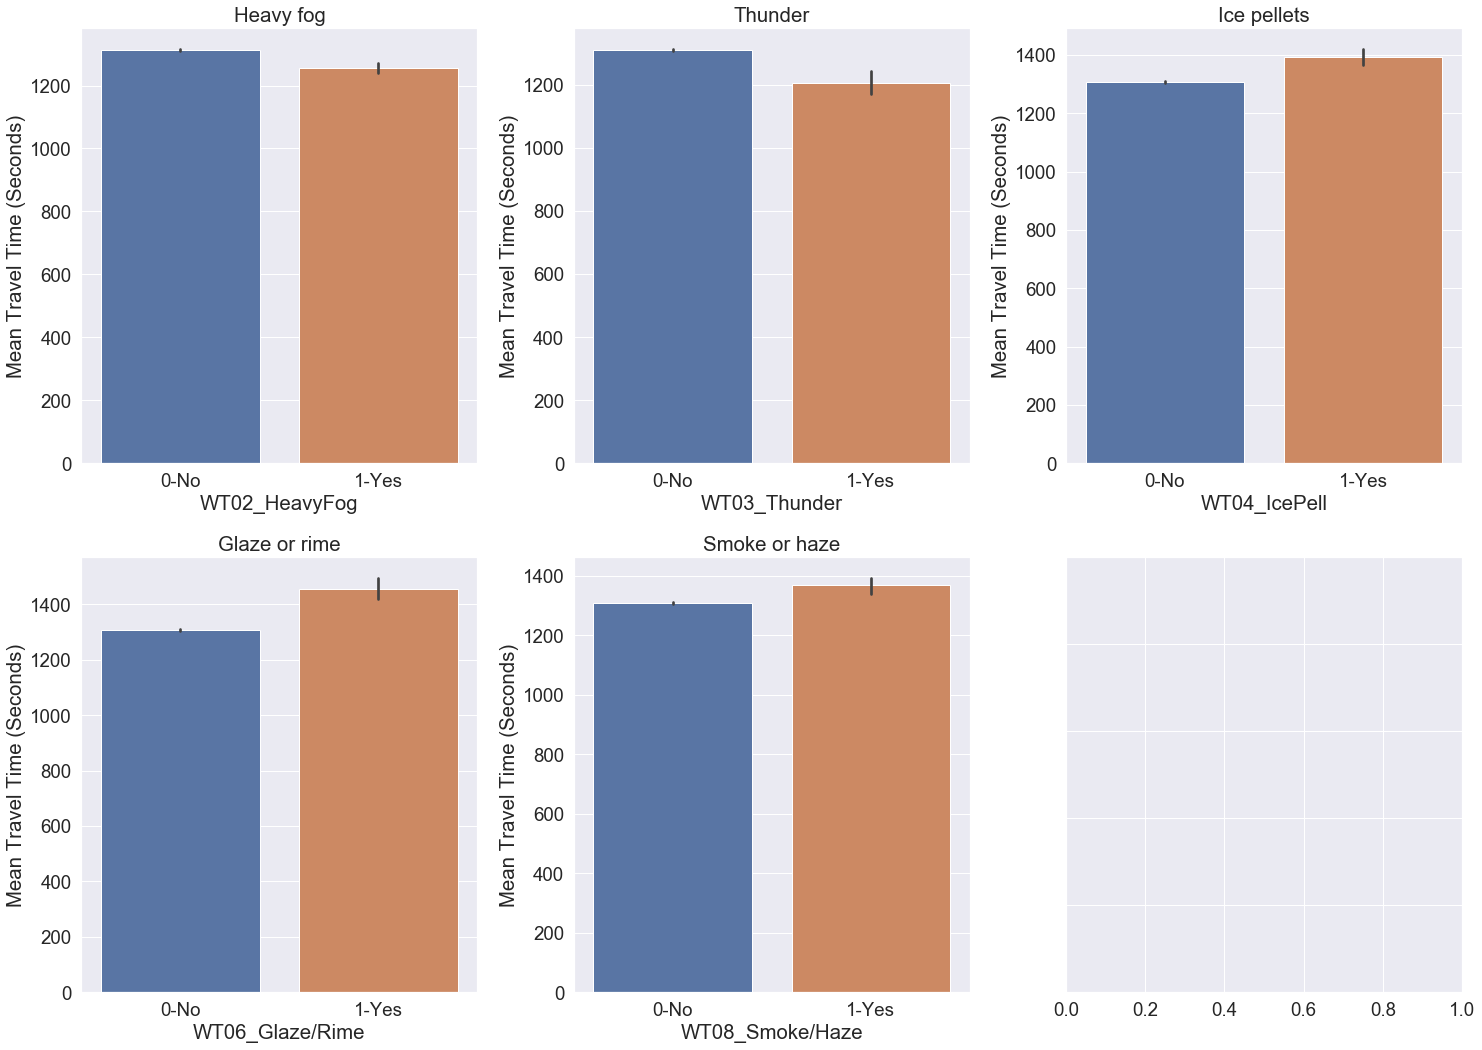

In [13]:
###1.5.3 Traveling time by weather type
#### barplot
f, axs = plt.subplots(2,3,figsize=(21,15),sharey='all')

plt.subplot(2,3,1)
ax40= sns.barplot(x=df_anly['WT02_HeavyFog'],y=df_anly['Mean Travel Time (Seconds)'], data=df_anly)
plt.xticks([0,1],['0-No', '1-Yes'])
plt.title('Heavy fog')

plt.subplot(2,3,2)
ax41= sns.barplot(x=df_anly['WT03_Thunder'],y=df_anly['Mean Travel Time (Seconds)'], data=df_anly)
plt.xticks([0,1],['0-No', '1-Yes'])
plt.title('Thunder')

plt.subplot(2,3,3)
ax42= sns.barplot(x=df_anly['WT04_IcePell'],y=df_anly['Mean Travel Time (Seconds)'], data=df_anly)
plt.title('Ice pellets')
plt.xticks([0,1],['0-No', '1-Yes'])


plt.subplot(2,3,4)
ax43 = sns.barplot(x=df_anly['WT06_Glaze/Rime'],y=df_anly['Mean Travel Time (Seconds)'], data=df_anly)
plt.title('Glaze or rime')
plt.xticks([0,1],['0-No', '1-Yes'])

plt.subplot(2,3,5)
ax44 = sns.barplot(x=df_anly['WT08_Smoke/Haze'],y=df_anly['Mean Travel Time (Seconds)'], data=df_anly)
plt.title('Smoke or haze')
plt.xticks([0,1],['0-No', '1-Yes'])



plt.tight_layout()
plt.show()

In [20]:
df_anly.columns

Index(['Mean Travel Time (Seconds)', 'Date', 'AWND', 'PRCP', 'SNOW', 'SNWD',
       'TAVG', 'WT02_HeavyFog', 'WT03_Thunder', 'WT04_IcePell',
       'WT06_Glaze/Rime', 'WT08_Smoke/Haze', 'Month', 'Day of Week',
       'DSTStrDen', 'DSTRailDen', 'ShorPth', 'Workday', 'DoW_Mon', 'DoW_Tue',
       'DoW_Wed', 'DoW_Thu', 'DoW_Fri', 'DoW_Sat', 'DoW_Sun', 'Month_Jan',
       'Month_Feb', 'Month_Mar', 'Log_Mean Travel Time'],
      dtype='object')

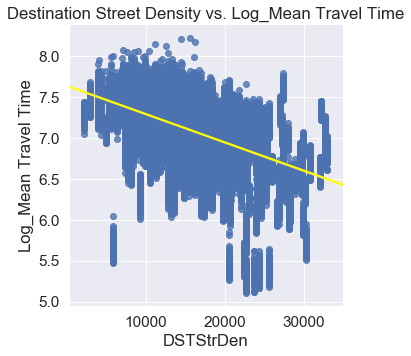

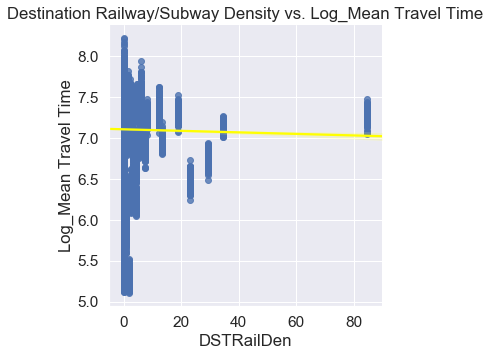

In [14]:
###1.5.5 Traveling time * street density / railway
sns.set(font_scale=1.4)
ax50=sns.lmplot(x='DSTStrDen', y="Log_Mean Travel Time", data=df_anly, line_kws={'color': 'yellow'});
plt.title('Destination Street Density vs. Log_Mean Travel Time')
plt.show()
ax60=sns.lmplot(x='DSTRailDen', y="Log_Mean Travel Time", data=df_anly, line_kws={'color': 'yellow'});
plt.title('Destination Railway/Subway Density vs. Log_Mean Travel Time')
plt.show()

C:\Users\fosha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


   Log_Mean Travel Time  Mean Travel Time (Seconds)          Workday  AWND  \
0              6.469250                         645  Weekend/Holiday  8.95   
1              7.365180                        1580  Weekend/Holiday  8.95   
2              7.067320                        1173  Weekend/Holiday  8.95   
3              7.398786                        1634  Weekend/Holiday  8.95   
4              6.816736                         913  Weekend/Holiday  8.95   

   TAVG  SNOW  PRCP  
0    15   0.0   0.0  
1    15   0.0   0.0  
2    15   0.0   0.0  
3    15   0.0   0.0  
4    15   0.0   0.0  


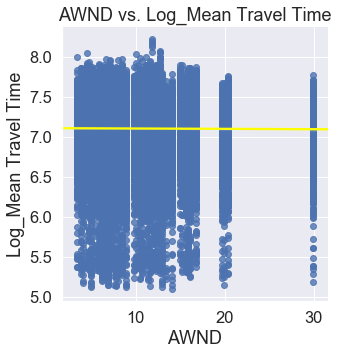

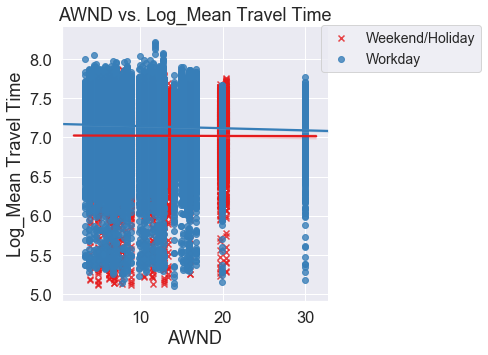

In [15]:
###1.5.6 Traveling time * AWND
WeaterPlt=df_anly[['Log_Mean Travel Time','Mean Travel Time (Seconds)','Workday','AWND','TAVG','SNOW','PRCP']]
WeaterPlt['Workday']=WeaterPlt['Workday'].map({1:'Workday',0:'Weekend/Holiday'})
print(WeaterPlt.head())
sns.set(font_scale=1.5)
ax70=sns.lmplot(x='AWND', y="Log_Mean Travel Time", data=WeaterPlt, line_kws={'color': 'yellow'});
plt.title('AWND vs. Log_Mean Travel Time')
ax71=sns.lmplot(x='AWND', y="Log_Mean Travel Time", hue="Workday", data=WeaterPlt,markers=["x", "o"],palette="Set1",legend=False);
ax71.despine(left=False)
plt.title('AWND vs. Log_Mean Travel Time')
plt.legend(bbox_to_anchor=(1.6, 1.03), fontsize=14)
plt.show()

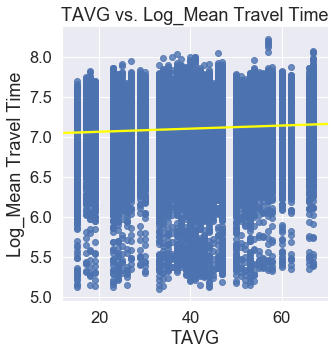

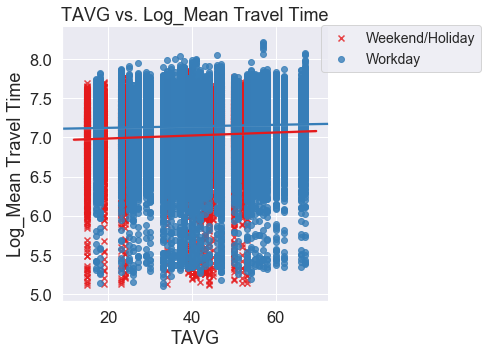

In [16]:
###1.5.6 Traveling time * TAVG
ax80=sns.lmplot(x='TAVG', y="Log_Mean Travel Time", data=WeaterPlt, line_kws={'color': 'yellow'});
plt.title('TAVG vs. Log_Mean Travel Time')
ax71=sns.lmplot(x='TAVG', y="Log_Mean Travel Time", hue="Workday", data=WeaterPlt,markers=["x", "o"],palette="Set1",legend=False);
ax71.despine(left=False)
plt.title('TAVG vs. Log_Mean Travel Time')
plt.legend(bbox_to_anchor=(1.6, 1.03), fontsize=14)
plt.show()


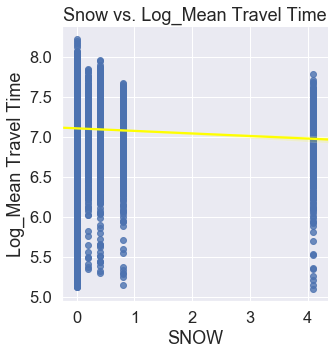

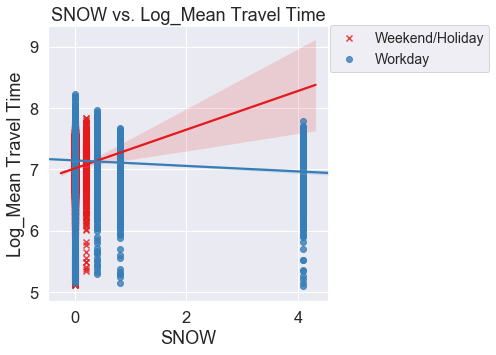

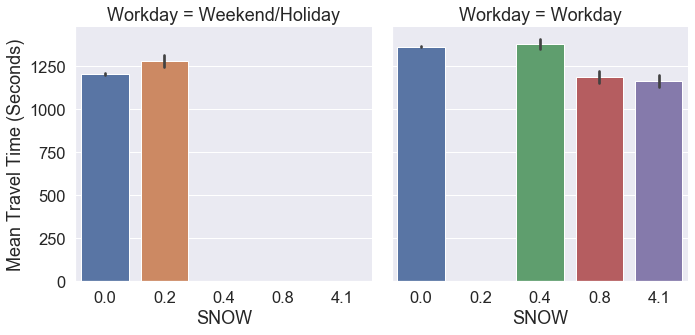

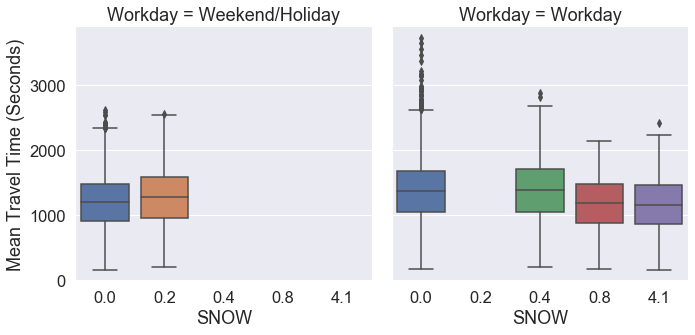

In [17]:
###1.5.7 Traveling time * SNOW 
ax90=sns.lmplot(x='SNOW', y="Log_Mean Travel Time", data=WeaterPlt, line_kws={'color': 'yellow'})
plt.title('Snow vs. Log_Mean Travel Time')
plt.show()
ax91=sns.lmplot(x='SNOW', y="Log_Mean Travel Time", hue="Workday", data=WeaterPlt,markers=["x", "o"],palette="Set1",legend=False);
ax91.despine(left=False)
plt.legend(bbox_to_anchor=(1.6, 1.03), fontsize=14)
plt.title('SNOW vs. Log_Mean Travel Time')
plt.show()
ax90_1 = sns.catplot(x='SNOW',y='Mean Travel Time (Seconds)', col="Workday",data=WeaterPlt,kind="bar")
#plt.title('Snow vs. Mean Travel Time (Seconds)')
plt.show()
ax90_2 = sns.catplot(x="SNOW", y='Mean Travel Time (Seconds)',col="Workday", data=WeaterPlt, kind="box")
plt.show()

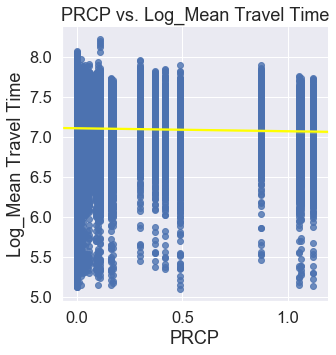

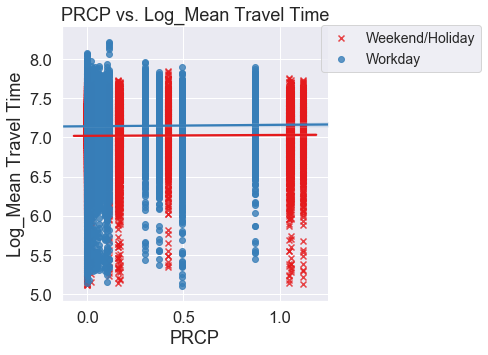

In [18]:
ax100=sns.lmplot(x='PRCP', y="Log_Mean Travel Time", data=WeaterPlt, line_kws={'color': 'yellow'});
plt.title('PRCP vs. Log_Mean Travel Time')
ax101=sns.lmplot(x='PRCP', y="Log_Mean Travel Time", hue="Workday", data=WeaterPlt,markers=["x", "o"],palette="Set1",legend=False);
ax101.despine(left=False)
plt.legend(bbox_to_anchor=(1.6, 1.03), fontsize=14)
plt.title('PRCP vs. Log_Mean Travel Time')
plt.show()


In [19]:
###1.6.1 workday regression modeling - Log data 

dropcol=['Mean Travel Time (Seconds)', 'Date', 'SNWD','AWND','SNOW',
         'WT02_HeavyFog', 'WT03_Thunder', 'WT04_IcePell','WT06_Glaze/Rime', 'WT08_Smoke/Haze',
         'Month','Day of Week']

mdl=df_anly.drop(dropcol,axis=1)
mdl.columns

Index(['PRCP', 'TAVG', 'DSTStrDen', 'DSTRailDen', 'ShorPth', 'Workday',
       'DoW_Mon', 'DoW_Tue', 'DoW_Wed', 'DoW_Thu', 'DoW_Fri', 'DoW_Sat',
       'DoW_Sun', 'Month_Jan', 'Month_Feb', 'Month_Mar',
       'Log_Mean Travel Time'],
      dtype='object')

In [20]:
## choose workday data and drop the null columns
Wkd=mdl[mdl['Workday']==1]
Wkd_stat=Wkd.describe().T
nancol=[i for i in Wkd_stat.index if Wkd_stat['std'][i] ==0]
print(nancol)
Wkd_0=Wkd.drop(nancol,axis=1)
Wkd_0.describe().T

['Workday', 'DoW_Sat', 'DoW_Sun']


,count,mean,std,min,25%,50%,75%,max
PRCP,32279.0,0.054230,0.146901,0.000000,0.000000,0.000000,0.030000,0.870000
TAVG,32279.0,41.789987,10.720233,17.000000,36.000000,40.000000,47.000000,67.000000
DSTStrDen,32279.0,15393.293008,5784.275885,2186.370621,11291.640689,14622.614265,18934.416556,32944.964144
DSTRailDen,32279.0,0.626651,4.538108,0.000000,0.000000,0.000000,0.000000,84.605391
ShorPth,32279.0,10830.165126,5285.996754,1138.114000,6911.758000,10530.614000,14259.870000,28964.231000
DoW_Mon,32279.0,0.158803,0.365498,0.000000,0.000000,0.000000,0.000000,1.000000
DoW_Tue,32279.0,0.208464,0.406216,0.000000,0.000000,0.000000,0.000000,1.000000
DoW_Wed,32279.0,0.209238,0.406771,0.000000,0.000000,0.000000,0.000000,1.000000
DoW_Thu,32279.0,0.210508,0.407676,0.000000,0.000000,0.000000,0.000000,1.000000
DoW_Fri,32279.0,0.212987,0.409425,0.000000,0.000000,0.000000,0.000000,1.000000


In [21]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
y=Wkd_0.pop('Log_Mean Travel Time')
X_wkd=sm.add_constant(Wkd_0)
dummydrop=['DoW_Mon','Month_Jan']
X_wkd=X_wkd.drop(dummydrop,axis=1)
X_wkd.columns

C:\Users\fosha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Index(['const', 'PRCP', 'TAVG', 'DSTStrDen', 'DSTRailDen', 'ShorPth',
       'DoW_Tue', 'DoW_Wed', 'DoW_Thu', 'DoW_Fri', 'Month_Feb', 'Month_Mar'],
      dtype='object')

In [22]:
##OLS regression
Wkd_est=sm.OLS(y,X_wkd).fit()
print(Wkd_est.summary())
## VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
Wkd_vif = pd.DataFrame()
Wkd_vif["VIF Factor"] = [variance_inflation_factor(X_wkd.values, i) for i in range(X_wkd.shape[1])]
Wkd_vif["Features"] = X_wkd.columns
print(Wkd_vif.round(3))

                             OLS Regression Results                             
Dep. Variable:     Log_Mean Travel Time   R-squared:                       0.464
Model:                              OLS   Adj. R-squared:                  0.464
Method:                   Least Squares   F-statistic:                     2540.
Date:                  Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                          19:41:54   Log-Likelihood:                -6799.1
No. Observations:                 32279   AIC:                         1.362e+04
Df Residuals:                     32267   BIC:                         1.372e+04
Df Model:                            11                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7438      0.012

In [23]:
##robust linear regression
Wkd_est_rlm=sm.RLM(y,X_wkd).fit()
print(Wkd_est_rlm.summary())

## VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
Wkd_vif_rlm = pd.DataFrame()
Wkd_vif_rlm["VIF Factor"] = [variance_inflation_factor(X_wkd.values, i) for i in range(X_wkd.shape[1])]
Wkd_vif_rlm["Features"] = X_wkd.columns
print(Wkd_vif_rlm.round(3))
print('Weekday Huber Robust Regression R-squared from Sklearn.metrics:',r2_score(y,Wkd_est_rlm.predict(X_wkd)))

                     Robust linear Model Regression Results                     
Dep. Variable:     Log_Mean Travel Time   No. Observations:                32279
Model:                              RLM   Df Residuals:                    32267
Method:                            IRLS   Df Model:                           11
Norm:                            HuberT                                         
Scale Est.:                         mad                                         
Cov Type:                            H1                                         
Date:                  Fri, 27 Mar 2020                                         
Time:                          19:41:57                                         
No. Iterations:                      50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8327      0.011

In [31]:
###1.6.2 nonworkday regression modeling

In [24]:
## choose nonworkday data and drop the null columns
NWkd=mdl[mdl['Workday']==0]
NWkd_stat=NWkd.describe().T
nancol_2=[i for i in NWkd_stat.index if NWkd_stat['std'][i] ==0]
print(nancol_2)
NWkd=NWkd.drop(nancol_2,axis=1)
NWkd=NWkd.rename(columns = {'DoW_Mon':'DoW_HDY'})
NWkd.describe().T


['Workday', 'DoW_Tue', 'DoW_Wed', 'DoW_Thu', 'DoW_Fri']


,count,mean,std,min,25%,50%,75%,max
PRCP,14924.0,0.153225,0.333339,0.000000,0.000000,0.000000,0.160000,1.120000
TAVG,14924.0,38.661552,10.708674,15.000000,39.000000,42.000000,45.000000,53.000000
DSTStrDen,14924.0,15284.893517,5778.211510,2186.370621,11190.819422,14483.940040,18725.251025,32944.964144
DSTRailDen,14924.0,0.615076,4.487522,0.000000,0.000000,0.000000,0.000000,84.605391
ShorPth,14924.0,11009.562216,5380.748629,1138.114000,6992.193000,10698.259000,14402.492000,28964.231000
DoW_HDY,14924.0,0.104530,0.305957,0.000000,0.000000,0.000000,0.000000,1.000000
DoW_Sat,14924.0,0.465425,0.498820,0.000000,0.000000,0.000000,1.000000,1.000000
DoW_Sun,14924.0,0.430046,0.495099,0.000000,0.000000,0.000000,1.000000,1.000000
Month_Jan,14924.0,0.354396,0.478346,0.000000,0.000000,0.000000,1.000000,1.000000
Month_Feb,14924.0,0.321429,0.467041,0.000000,0.000000,0.000000,1.000000,1.000000


In [25]:
y_nwkd=NWkd.pop('Log_Mean Travel Time')
y_nwkd.head()

0    6.469250
1    7.365180
2    7.067320
3    7.398786
4    6.816736
Name: Log_Mean Travel Time, dtype: float64

In [26]:
X_nwkd=sm.add_constant(NWkd)
dummydrop_2=['DoW_Sun','Month_Jan']
X_nwkd=X_nwkd.drop(dummydrop_2,axis=1)
X_nwkd.describe().T


C:\Users\fosha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,count,mean,std,min,25%,50%,75%,max
const,14924.0,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000
PRCP,14924.0,0.153225,0.333339,0.000000,0.000000,0.00000,0.160000,1.120000
TAVG,14924.0,38.661552,10.708674,15.000000,39.000000,42.00000,45.000000,53.000000
DSTStrDen,14924.0,15284.893517,5778.211510,2186.370621,11190.819422,14483.94004,18725.251025,32944.964144
DSTRailDen,14924.0,0.615076,4.487522,0.000000,0.000000,0.00000,0.000000,84.605391
ShorPth,14924.0,11009.562216,5380.748629,1138.114000,6992.193000,10698.25900,14402.492000,28964.231000
DoW_HDY,14924.0,0.104530,0.305957,0.000000,0.000000,0.00000,0.000000,1.000000
DoW_Sat,14924.0,0.465425,0.498820,0.000000,0.000000,0.00000,1.000000,1.000000
Month_Feb,14924.0,0.321429,0.467041,0.000000,0.000000,0.00000,1.000000,1.000000
Month_Mar,14924.0,0.324176,0.468082,0.000000,0.000000,0.00000,1.000000,1.000000


In [27]:
## OLS regression
NWkd_est=sm.OLS(y_nwkd,X_nwkd).fit()
print(NWkd_est.summary())
## VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
NWkd_vif = pd.DataFrame()
NWkd_vif["VIF Factor"] = [variance_inflation_factor(X_nwkd.values, i) for i in range(X_nwkd.shape[1])]
NWkd_vif["Features"] = X_nwkd.columns
print(NWkd_vif.round(3))

                             OLS Regression Results                             
Dep. Variable:     Log_Mean Travel Time   R-squared:                       0.443
Model:                              OLS   Adj. R-squared:                  0.443
Method:                   Least Squares   F-statistic:                     1317.
Date:                  Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                          19:42:12   Log-Likelihood:                -3511.1
No. Observations:                 14924   AIC:                             7042.
Df Residuals:                     14914   BIC:                             7118.
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5676      0.017

In [28]:
## RLM regression
NWkd_est_rlm=sm.RLM(y_nwkd,X_nwkd).fit()
print(NWkd_est_rlm.summary())
## VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
NWkd_vif_rlm = pd.DataFrame()
NWkd_vif_rlm["VIF Factor"] = [variance_inflation_factor(X_nwkd.values, i) for i in range(X_nwkd.shape[1])]
NWkd_vif_rlm["Features"] = X_nwkd.columns
print(NWkd_vif_rlm.round(3))
print('Weekend Huber Robust Regression R-squared from Sklearn.metrics:',r2_score(y_nwkd,NWkd_est_rlm.predict(X_nwkd)))

                     Robust linear Model Regression Results                     
Dep. Variable:     Log_Mean Travel Time   No. Observations:                14924
Model:                              RLM   Df Residuals:                    14914
Method:                            IRLS   Df Model:                            9
Norm:                            HuberT                                         
Scale Est.:                         mad                                         
Cov Type:                            H1                                         
Date:                  Fri, 27 Mar 2020                                         
Time:                          19:42:15                                         
No. Iterations:                      50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6625      0.017

In [29]:
##heatmap
import geopandas as gpd
WDC_GEO=gpd.read_file ('washington_DC_censustracts.json')
#WDC_GEO=gpd.read_file ('G:/My Drive/Uber movement/Codes and datasets/Datasets/washington_DC_censustracts.json')
WDC_GEO.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 3 columns):
MOVEMENT_ID     558 non-null object
DISPLAY_NAME    558 non-null object
geometry        558 non-null geometry
dtypes: geometry(1), object(2)
memory usage: 13.2+ KB


In [30]:
col=['Destination Movement ID','Mean Travel Time (Seconds)','Date']
df_map=pd.read_csv('dc_2018q1.csv',usecols=col)
df_map.shape

(47384, 3)

In [31]:
##1.1 Weekday column
dc_holidays = holidays.UnitedStates(state='DC')
Q1_holiday={dc_holidays.get(i) for i in df_map.Date}
print(Q1_holiday)
df_map['Workday']=df_map.Date.apply(lambda x: 1 if (not x in dc_holidays) and (pd.to_datetime(x).weekday()<5) else 0)
z=zip(df_map['Date'],df_map['Workday'])
dict_wk=dict(z)
print(dict_wk)
df_map=df_map.drop(['Date'],axis=1)
df_map.columns


{'Martin Luther King, Jr. Day', "Washington's Birthday", None, "New Year's Day"}
{'1/7/2018': 0, '1/6/2018': 0, '1/9/2018': 1, '1/8/2018': 1, '1/3/2018': 1, '2/11/2018': 0, '2/10/2018': 0, '1/2/2018': 1, '1/22/2018': 1, '1/25/2018': 1, '1/30/2018': 1, '1/29/2018': 1, '1/23/2018': 1, '1/24/2018': 1, '1/26/2018': 1, '1/28/2018': 0, '1/21/2018': 0, '1/20/2018': 0, '1/15/2018': 0, '1/12/2018': 1, '1/27/2018': 0, '1/19/2018': 1, '1/13/2018': 0, '1/16/2018': 1, '1/14/2018': 0, '1/17/2018': 1, '1/18/2018': 1, '1/1/2018': 0, '1/11/2018': 1, '1/10/2018': 1, '3/29/2018': 1, '3/27/2018': 1, '3/7/2018': 1, '3/6/2018': 1, '3/9/2018': 1, '3/8/2018': 1, '3/5/2018': 1, '3/3/2018': 0, '3/4/2018': 0, '3/23/2018': 1, '3/22/2018': 1, '3/21/2018': 1, '3/13/2018': 1, '3/16/2018': 1, '3/12/2018': 1, '3/1/2018': 1, '3/28/2018': 1, '3/31/2018': 0, '2/4/2018': 0, '2/3/2018': 0, '2/6/2018': 1, '2/9/2018': 1, '2/23/2018': 1, '2/20/2018': 1, '2/17/2018': 0, '2/18/2018': 0, '2/22/2018': 1, '2/14/2018': 1, '2/13/201

Index(['Destination Movement ID', 'Mean Travel Time (Seconds)', 'Workday'], dtype='object')

In [32]:
workday=df_map[df_map['Workday']==1]
time_work=workday.groupby('Destination Movement ID')['Mean Travel Time (Seconds)'].aggregate('mean').to_frame()
workdaydrop=[i for i in WDC_GEO['MOVEMENT_ID'] if int(i) not in time_work.index]
print(workdaydrop)
idx=[ WDC_GEO[WDC_GEO['MOVEMENT_ID']==i].index[0] for i in workdaydrop]
print(idx)
Wk_GEO=WDC_GEO.drop(WDC_GEO.index[idx])
print(Wk_GEO.loc[Wk_GEO['MOVEMENT_ID']=='258'])
print(Wk_GEO.shape[0])
Wk_GEO.head(20)

['12', '258', '309', '427', '519']
[11, 257, 308, 426, 518]
Empty GeoDataFrame
Columns: [MOVEMENT_ID, DISPLAY_NAME, geometry]
Index: []
553


,MOVEMENT_ID,DISPLAY_NAME,geometry
0,1,"5400 Arnold Avenue Southwest, Southwest Washin...","MULTIPOLYGON (((-77.04801 38.84127, -77.04797 ..."
1,2,"1400 Juniper Street Northwest, Northwest Washi...","MULTIPOLYGON (((-77.05162 38.98714, -77.05177 ..."
2,3,"4800 Canal Road Northwest, Northwest Washingto...","MULTIPOLYGON (((-77.11975 38.93435, -77.11886 ..."
3,4,"2700 Unicorn Lane Northwest, Northwest Washing...","MULTIPOLYGON (((-77.07165 38.97179, -77.07125 ..."
4,5,"4500 Q Place Northwest, Northwest Washington, ...","MULTIPOLYGON (((-77.10086 38.91121, -77.09958 ..."
5,6,"Ridge Road Northwest, Northwest Washington, Wa...","MULTIPOLYGON (((-77.06942 38.95434, -77.06931 ..."
6,7,"4500 Ohio Drive Southwest, Southwest Washingto...","MULTIPOLYGON (((-77.06470 38.89185, -77.06463 ..."
7,8,"0 H Street Northwest, Northwest Washington, Wa...","MULTIPOLYGON (((-77.02192 38.90252, -77.02151 ..."
8,9,"1800 Upshur Street Northwest, Northwest Washin...","MULTIPOLYGON (((-77.05211 38.93799, -77.05211 ..."
9,10,"1500 30th Street Northwest, Northwest Washingt...","MULTIPOLYGON (((-77.06927 38.90058, -77.06872 ..."


In [99]:
WDC_GEO.head(20)

,MOVEMENT_ID,DISPLAY_NAME,geometry
0,1,"5400 Arnold Avenue Southwest, Southwest Washin...","MULTIPOLYGON (((-77.04801 38.84127, -77.04797 ..."
1,2,"1400 Juniper Street Northwest, Northwest Washi...","MULTIPOLYGON (((-77.05162 38.98714, -77.05177 ..."
2,3,"4800 Canal Road Northwest, Northwest Washingto...","MULTIPOLYGON (((-77.11975 38.93435, -77.11886 ..."
3,4,"2700 Unicorn Lane Northwest, Northwest Washing...","MULTIPOLYGON (((-77.07165 38.97179, -77.07125 ..."
4,5,"4500 Q Place Northwest, Northwest Washington, ...","MULTIPOLYGON (((-77.10086 38.91121, -77.09958 ..."
5,6,"Ridge Road Northwest, Northwest Washington, Wa...","MULTIPOLYGON (((-77.06942 38.95434, -77.06931 ..."
6,7,"4500 Ohio Drive Southwest, Southwest Washingto...","MULTIPOLYGON (((-77.06470 38.89185, -77.06463 ..."
7,8,"0 H Street Northwest, Northwest Washington, Wa...","MULTIPOLYGON (((-77.02192 38.90252, -77.02151 ..."
8,9,"1800 Upshur Street Northwest, Northwest Washin...","MULTIPOLYGON (((-77.05211 38.93799, -77.05211 ..."
9,10,"1500 30th Street Northwest, Northwest Washingt...","MULTIPOLYGON (((-77.06927 38.90058, -77.06872 ..."


In [33]:
Wk_GEO['Mean Travel Time (Seconds)']=[time_work['Mean Travel Time (Seconds)'][int(i)] for i in Wk_GEO['MOVEMENT_ID'] if int(i) in time_work.index]
print(Wk_GEO.shape)
Wk_GEO.head(20)

(553, 4)


,MOVEMENT_ID,DISPLAY_NAME,geometry,Mean Travel Time (Seconds)
0,1,"5400 Arnold Avenue Southwest, Southwest Washin...","MULTIPOLYGON (((-77.04801 38.84127, -77.04797 ...",906.951613
1,2,"1400 Juniper Street Northwest, Northwest Washi...","MULTIPOLYGON (((-77.05162 38.98714, -77.05177 ...",1702.435484
2,3,"4800 Canal Road Northwest, Northwest Washingto...","MULTIPOLYGON (((-77.11975 38.93435, -77.11886 ...",1368.241935
3,4,"2700 Unicorn Lane Northwest, Northwest Washing...","MULTIPOLYGON (((-77.07165 38.97179, -77.07125 ...",1733.467742
4,5,"4500 Q Place Northwest, Northwest Washington, ...","MULTIPOLYGON (((-77.10086 38.91121, -77.09958 ...",1113.064516
5,6,"Ridge Road Northwest, Northwest Washington, Wa...","MULTIPOLYGON (((-77.06942 38.95434, -77.06931 ...",1444.822581
6,7,"4500 Ohio Drive Southwest, Southwest Washingto...","MULTIPOLYGON (((-77.06470 38.89185, -77.06463 ...",305.209677
7,8,"0 H Street Northwest, Northwest Washington, Wa...","MULTIPOLYGON (((-77.02192 38.90252, -77.02151 ...",219.032258
8,9,"1800 Upshur Street Northwest, Northwest Washin...","MULTIPOLYGON (((-77.05211 38.93799, -77.05211 ...",1244.806452
9,10,"1500 30th Street Northwest, Northwest Washingt...","MULTIPOLYGON (((-77.06927 38.90058, -77.06872 ...",810.096774


In [103]:
#pip install mapclassify

  Created wheel for mapclassify: filename=mapclassify-2.2.0-cp37-none-any.whl size=47034 sha256=370d3e61609a1e1cc72cc3ca49c8b2b611a28674149ef7ed47439748aa0ec378
  Stored in directory: C:\Users\fosha\AppData\Local\pip\Cache\wheels\96\0c\c1\b2bce9fc10da2e6c6befc9fe5929adca7c71b7c4abd1fc42f0
Successfully built mapclassify
Note: you may need to restart the kernel to use updated packages.


In [34]:
#Set mapclassifier
import mapclassify as mc
print(Wk_GEO.describe())
QU = mc.Quantiles(Wk_GEO['Mean Travel Time (Seconds)'], k=5)
FJ = mc.FisherJenks(Wk_GEO['Mean Travel Time (Seconds)'], k=5)
EQ = mc.EqualInterval(Wk_GEO['Mean Travel Time (Seconds)'], k=5)
print(QU,'\r\n',FJ,'\r\n',EQ)
print(FJ.yb)

       Mean Travel Time (Seconds)
count                  553.000000
mean                  1385.503172
std                    451.515767
min                    211.887097
25%                   1069.209677
50%                   1423.032258
75%                   1710.121951
max                   2480.750000
Quantiles                 

     Interval        Count
--------------------------
[ 211.89,  981.33] |   111
( 981.33, 1285.60] |   110
(1285.60, 1544.14] |   111
(1544.14, 1788.37] |   110
(1788.37, 2480.75] |   111 
 FisherJenks               

     Interval        Count
--------------------------
[ 211.89,  743.05] |    51
( 743.05, 1150.40] |   121
(1150.40, 1496.29] |   138
(1496.29, 1848.81] |   157
(1848.81, 2480.75] |    86 
 EqualInterval             

     Interval        Count
--------------------------
[ 211.89,  665.66] |    37
( 665.66, 1119.43] |   119
(1119.43, 1573.20] |   195
(1573.20, 2026.98] |   163
(2026.98, 2480.75] |    39
[1 3 2 3 1 2 0 0 2 1 3 4 3 4 4 3 3 0 0 

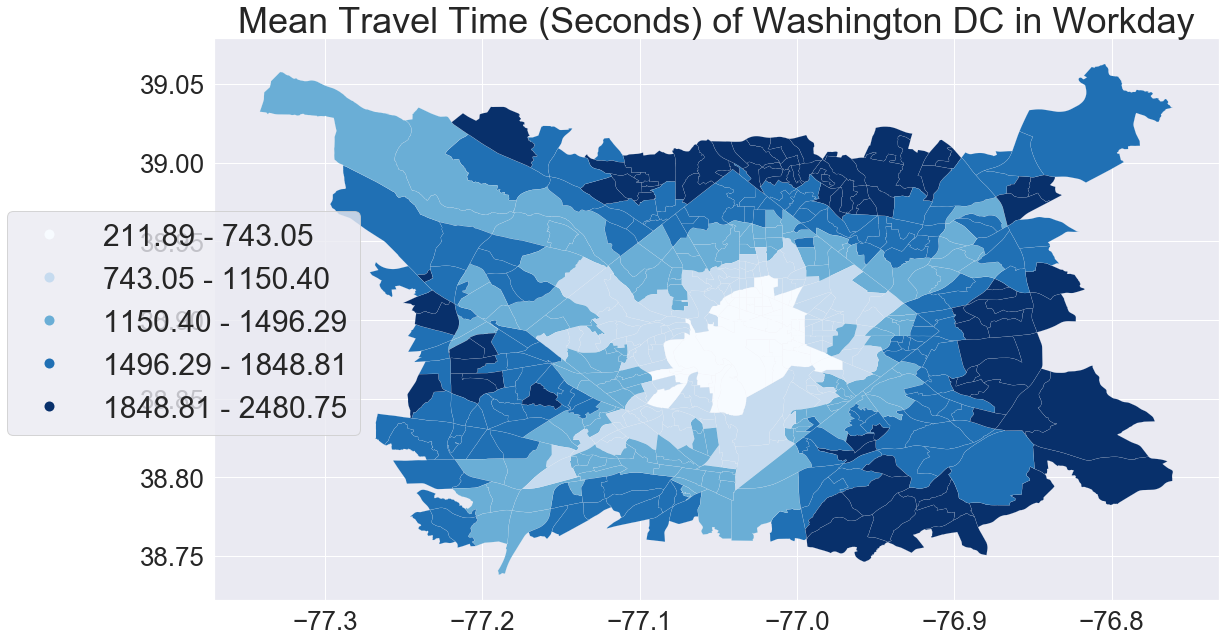

In [35]:
ax1=Wk_GEO.plot(column='Mean Travel Time (Seconds)',
                                cmap='Blues', linewidth=0.1,scheme='Fisher_Jenks',
                              edgecolor='white', legend=True,figsize=(18, 12),legend_kwds={'fontsize': '30','frameon': True})
title='Mean Travel Time (Seconds) of Washington DC in Workday'
ax1.set_title(title,fontsize=36)
ax1.get_legend().set_bbox_to_anchor((.16, .72))
ax1.tick_params(axis='x', labelsize=26)
ax1.tick_params(axis='y', labelsize=26)
plt.show()

In [36]:
wkend=df_map[df_map['Workday']==0]
time_wkend=wkend.groupby('Destination Movement ID')['Mean Travel Time (Seconds)'].aggregate('mean').to_frame()
wkddrop=[i for i in WDC_GEO['MOVEMENT_ID'] if int(i) not in time_wkend.index]
print(wkddrop)
idx2=[ WDC_GEO[WDC_GEO['MOVEMENT_ID']==i].index[0] for i in wkddrop]
print(idx2)
Wkd_GEO=WDC_GEO.drop(WDC_GEO.index[idx2])
print(Wkd_GEO.loc[Wkd_GEO['MOVEMENT_ID']=='309'])
print(Wkd_GEO.shape[0])
Wkd_GEO.head(20)

['258', '309']
[257, 308]
Empty GeoDataFrame
Columns: [MOVEMENT_ID, DISPLAY_NAME, geometry]
Index: []
556


,MOVEMENT_ID,DISPLAY_NAME,geometry
0,1,"5400 Arnold Avenue Southwest, Southwest Washin...","MULTIPOLYGON (((-77.04801 38.84127, -77.04797 ..."
1,2,"1400 Juniper Street Northwest, Northwest Washi...","MULTIPOLYGON (((-77.05162 38.98714, -77.05177 ..."
2,3,"4800 Canal Road Northwest, Northwest Washingto...","MULTIPOLYGON (((-77.11975 38.93435, -77.11886 ..."
3,4,"2700 Unicorn Lane Northwest, Northwest Washing...","MULTIPOLYGON (((-77.07165 38.97179, -77.07125 ..."
4,5,"4500 Q Place Northwest, Northwest Washington, ...","MULTIPOLYGON (((-77.10086 38.91121, -77.09958 ..."
5,6,"Ridge Road Northwest, Northwest Washington, Wa...","MULTIPOLYGON (((-77.06942 38.95434, -77.06931 ..."
6,7,"4500 Ohio Drive Southwest, Southwest Washingto...","MULTIPOLYGON (((-77.06470 38.89185, -77.06463 ..."
7,8,"0 H Street Northwest, Northwest Washington, Wa...","MULTIPOLYGON (((-77.02192 38.90252, -77.02151 ..."
8,9,"1800 Upshur Street Northwest, Northwest Washin...","MULTIPOLYGON (((-77.05211 38.93799, -77.05211 ..."
9,10,"1500 30th Street Northwest, Northwest Washingt...","MULTIPOLYGON (((-77.06927 38.90058, -77.06872 ..."


In [37]:
Wkd_GEO['Mean Travel Time (Seconds)']=[time_wkend['Mean Travel Time (Seconds)'][int(i)] for i in Wkd_GEO['MOVEMENT_ID'] if int(i) in time_wkend.index]
print(Wkd_GEO.shape)
Wkd_GEO.head(20)

(556, 4)


,MOVEMENT_ID,DISPLAY_NAME,geometry,Mean Travel Time (Seconds)
0,1,"5400 Arnold Avenue Southwest, Southwest Washin...","MULTIPOLYGON (((-77.04801 38.84127, -77.04797 ...",707.571429
1,2,"1400 Juniper Street Northwest, Northwest Washi...","MULTIPOLYGON (((-77.05162 38.98714, -77.05177 ...",1629.214286
2,3,"4800 Canal Road Northwest, Northwest Washingto...","MULTIPOLYGON (((-77.11975 38.93435, -77.11886 ...",1233.428571
3,4,"2700 Unicorn Lane Northwest, Northwest Washing...","MULTIPOLYGON (((-77.07165 38.97179, -77.07125 ...",1669.535714
4,5,"4500 Q Place Northwest, Northwest Washington, ...","MULTIPOLYGON (((-77.10086 38.91121, -77.09958 ...",969.678571
5,6,"Ridge Road Northwest, Northwest Washington, Wa...","MULTIPOLYGON (((-77.06942 38.95434, -77.06931 ...",1398.785714
6,7,"4500 Ohio Drive Southwest, Southwest Washingto...","MULTIPOLYGON (((-77.06470 38.89185, -77.06463 ...",272.821429
7,8,"0 H Street Northwest, Northwest Washington, Wa...","MULTIPOLYGON (((-77.02192 38.90252, -77.02151 ...",195.392857
8,9,"1800 Upshur Street Northwest, Northwest Washin...","MULTIPOLYGON (((-77.05211 38.93799, -77.05211 ...",1174.964286
9,10,"1500 30th Street Northwest, Northwest Washingt...","MULTIPOLYGON (((-77.06927 38.90058, -77.06872 ...",703.000000


In [38]:
bins=list(FJ.bins)
bins.insert(0,0)
print(bins)
labels=[0,1,2,3,4]
Wkd_GEO['Fisher_Jenks_Scheme']=pd.cut(Wkd_GEO['Mean Travel Time (Seconds)'],bins=bins,right=True,labels=labels)
print(Wkd_GEO.describe())
Wkd_GEO.head()


[0, 743.0483870967741, 1150.4032258064517, 1496.2857142857142, 1848.8064516129032, 2480.75]
       Mean Travel Time (Seconds)
count                  556.000000
mean                  1220.802366
std                    411.496989
min                    191.535714
25%                    929.607143
50%                   1241.982143
75%                   1504.875000
max                   2226.464286


,MOVEMENT_ID,DISPLAY_NAME,geometry,Mean Travel Time (Seconds),Fisher_Jenks_Scheme
0,1,"5400 Arnold Avenue Southwest, Southwest Washin...","MULTIPOLYGON (((-77.04801 38.84127, -77.04797 ...",707.571429,0
1,2,"1400 Juniper Street Northwest, Northwest Washi...","MULTIPOLYGON (((-77.05162 38.98714, -77.05177 ...",1629.214286,3
2,3,"4800 Canal Road Northwest, Northwest Washingto...","MULTIPOLYGON (((-77.11975 38.93435, -77.11886 ...",1233.428571,2
3,4,"2700 Unicorn Lane Northwest, Northwest Washing...","MULTIPOLYGON (((-77.07165 38.97179, -77.07125 ...",1669.535714,3
4,5,"4500 Q Place Northwest, Northwest Washington, ...","MULTIPOLYGON (((-77.10086 38.91121, -77.09958 ...",969.678571,1


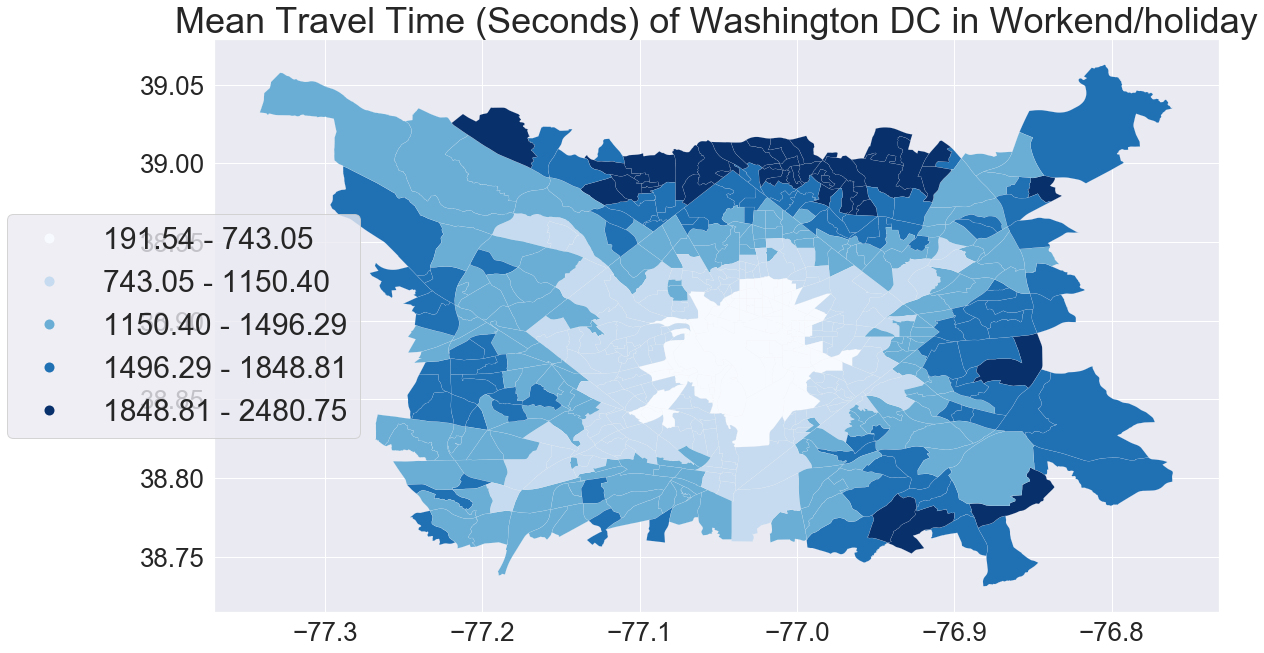

In [39]:
title='Mean Travel Time (Seconds) of Washington DC in Workend/holiday'
labels=['191.54-743.05','743.05-1150.40','1150.40-1496.29', '1496.29-1848.81', '1848.81-2480.75']
ax2=Wkd_GEO.plot(column='Fisher_Jenks_Scheme',
                                cmap='Blues', linewidth=0.1,categorical=True,
                              edgecolor='white', legend=True,figsize=(18, 12),legend_kwds={'fontsize': '30','frameon': True})
ax2.set_title(title,fontsize=36)
leg = ax2.get_legend()
leg.get_texts()[0].set_text('191.54 - 743.05')
leg.get_texts()[1].set_text('743.05 - 1150.40')
leg.get_texts()[2].set_text('1150.40 - 1496.29')
leg.get_texts()[3].set_text('1496.29 - 1848.81')
leg.get_texts()[4].set_text('1848.81 - 2480.75')
ax2.tick_params(axis='x', labelsize=26)
ax2.tick_params(axis='y', labelsize=26)
ax2.get_legend().set_bbox_to_anchor((.16, .72))
plt.show()